# Importing necessary packages

In [27]:
import pandas as pd # For handling the data

import seaborn as sns # For plotting
import matplotlib.pyplot as plt 
import plotly_express as px 

import numpy as np

# reading in the file


In [28]:
df = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Riket") # Using pandas read_excel function to read the data in excel


## Initial Data Analisys

In [29]:
df.head(3) #  To get the 3 first just to see what the column names are and a bit of info och what the data looks like

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0


In [30]:
df.info() # Get relevant data och how many entries are null and what Data type they are
# No nulls, No objects in data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [31]:
df.describe() # Get useful data like max number in veckonumber is 53. 

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [32]:
df.isnull().sum() # No nulls.

år                                0
veckonummer                       0
Antal_fall_vecka                  0
Antal_fall_100000inv_vecka        0
Antal_fall_100000inv_14dagar      0
Kum_antal_fall                    0
Kum_fall_100000inv                0
Antal_nyaintensivvårdade_vecka    0
Kum_antal_intensivvårdade         0
Antal_avlidna_vecka               0
Antal_avlidna_milj_inv_vecka      0
Kum_antal_avlidna                 0
Kum_antal_avlidna_milj_inv        0
dtype: int64

# Combine Year and Veckonummer

In [33]:
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str))
df.pop("år")
df.pop("veckonummer")

df.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


## Plotting with Seaborn

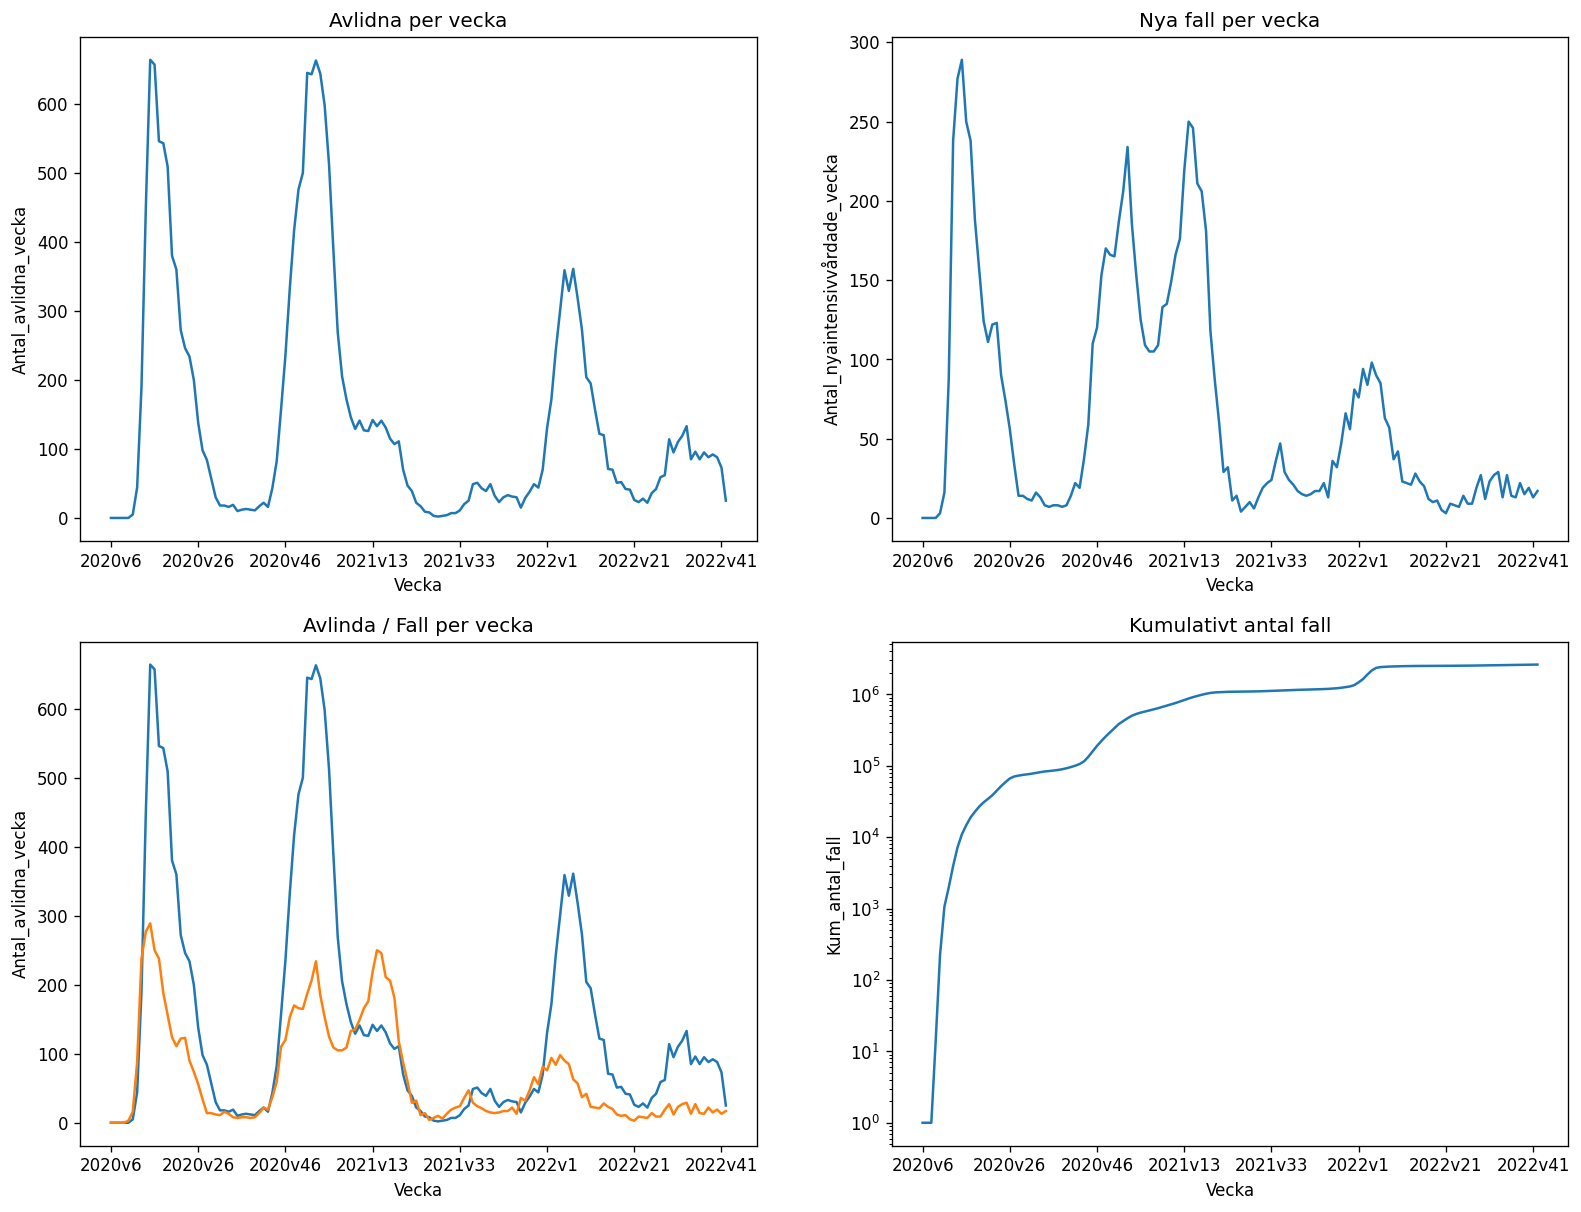

In [34]:
year = df["Vecka"]

fig, ax = plt.subplots(2,2, figsize = (16, 12), dpi = 120)

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[0,0]) # Title is not informativ. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[0,1]) # Same as above

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[1,0])
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[1,0]) # Same as above

sns.lineplot(df, x = year, y = df["Kum_antal_fall"], ax = ax[1,1]).set_yscale("log") # Same as above


ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(9))

ax[0,0].set(title="Avlidna per vecka")
ax[0,1].set(title="Nya fall per vecka")
ax[1,0].set(title="Avlinda / Fall per vecka")
ax[1,1].set(title="Kumulativt antal fall");


In [35]:
# Creating lists of necessary data
# 

# Function for plotting Seaborn Graphs

In [36]:
# Function for plotting seaborn graphs.
titles = [
    "Antal Avlidna per Vecka",
    "Antal Fall per Vecka",
    "Avlidna och Fall / Vecka",
    "Kumulativt Antal Fall",
]
datapoints = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Kum_antal_fall",
]
y_label = ["Antal Personer"] * 4


def sns_plot_func(x, y, label, data):  # setting the function
    """Used to quickly plot with seaborn"""  # Docstring PLACEHOLDER
    fig, ax = plt.subplots(
        figsize=(16, 8), dpi=120
    )  # Subplot. TODO add actual subplots with ifstatement to check if list is >=2
    sns.lineplot(data=data, x=x, y=y, label=label)  # Plot code
    ax.xaxis.set_major_locator(
        plt.MaxNLocator(15)
    )  # Set major locator to not show all values on x.
    ax.xaxis.set_tick_params(rotation=-45)
    #ax.set_ylabel(y_label)
    if (
        data[y].max() >= 10**6
    ):  # ifstatement to see if y data is above 1000000. if it is set yscale to logorithmic scale.
        ax.set_yscale("log")


#for axes, title, y_label in zip(ax.reshape(-1), titles, y_label):
#for i in range(5):
    #sns_plot_func(year, datapoints[i], titles[i], df)


4
4
['Antal_avlidna_vecka', 'Antal_fall_vecka', 'Antal_avlidna_vecka', 'Antal_fall_vecka', 'Kum_antal_fall']


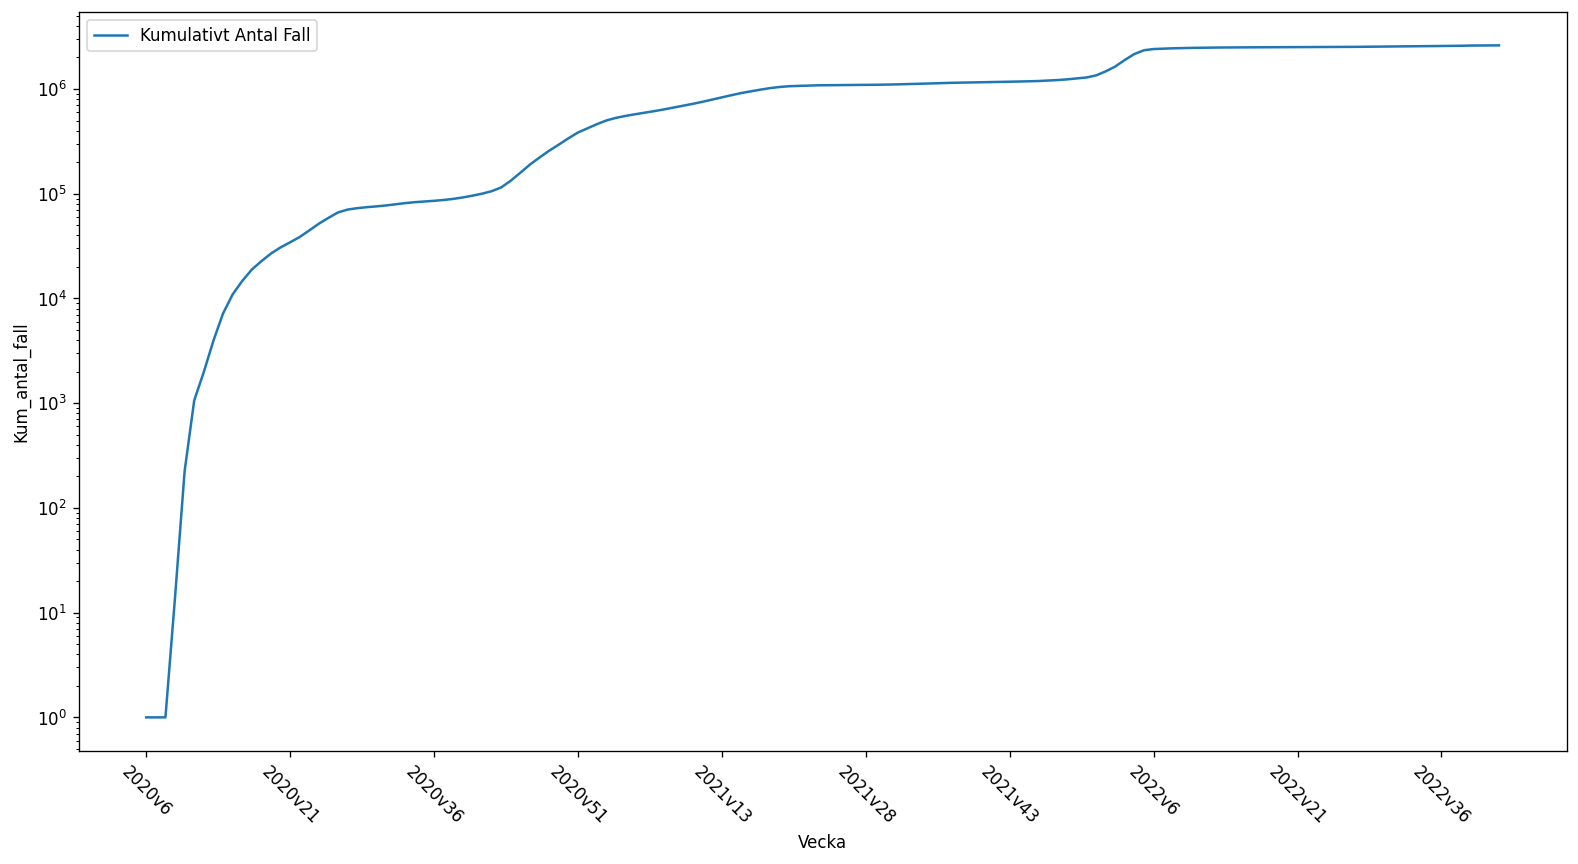

In [37]:
sns_plot_func(year, "Kum_antal_fall",titles[3], df)#, #sns_plot_func(year, "Antal_nyaintensivvårdade_vecka",df)
print(len(y_label))
print(len(titles))
print((datapoints))


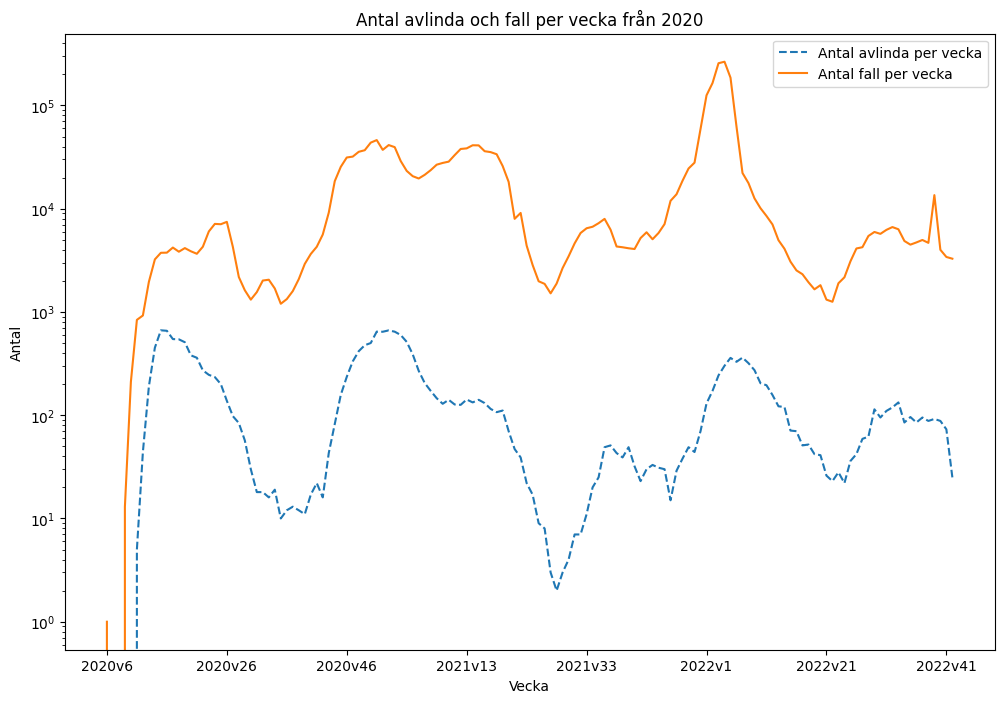

In [38]:
fig, ax = plt.subplots(figsize =(12,8)) # Sams code.Temporary for testing.
ax = sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df, label= "Antal avlinda per vecka", linestyle="dashed")
ax1 = sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df, label="Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(xlabel = "Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020")
ax1.set_yscale('log')

#to fix scale 2 # https://www.geeksforgeeks.org/matplotlib-pyplot-twinx-in-python/



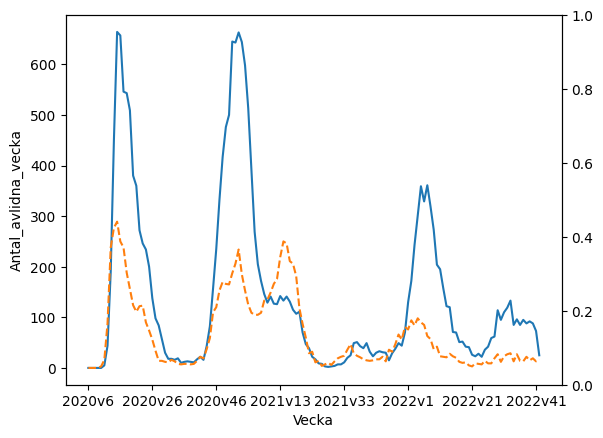

In [39]:
sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"]).xaxis.set_major_locator(plt.MaxNLocator(9)) # Title is not informative. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], linestyle = "dashed").twinx();#.xaxis.set_major_locator(plt.MaxNLocator(9)) # Same as above

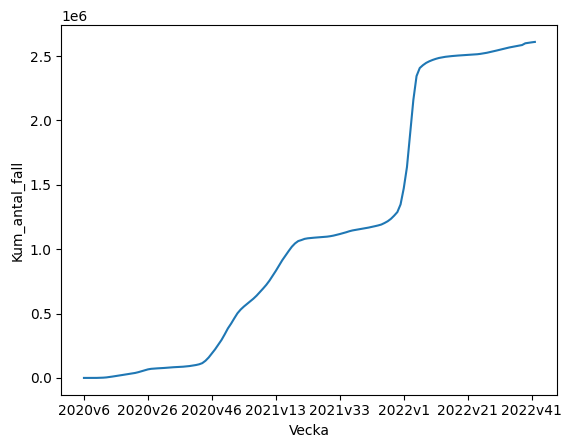

In [40]:
# f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

sns.lineplot(df, x = year, y = df["Kum_antal_fall"]).xaxis.set_major_locator(plt.MaxNLocator(9))

# Plotly express plotting C-F

In [41]:
px.line(df, x = "Vecka", y = "Antal_avlidna_vecka", title = "Antal Avldina per Vecka").update_layout(yaxis_title = "Antal Personer")


In [42]:
px.line(df, x = "Vecka", y = "Antal_fall_vecka", title = "Antal Fall per Vecka").update_layout(yaxis_title = "Antal Personer")

In [43]:
px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka","Antal_fall_vecka"], title = "Antal Avlidna och Fall per Vecka").update_layout(yaxis_title = "Antal Personer")

In [44]:
px.line(df, x = "Vecka", y = "Kum_antal_fall", title = "Kumulativt Antal Fall per vecka").update_layout(yaxis_title = "Antal Personer")

## Uppgift 2

In [45]:
df_vaccine = pd.read_excel("../Lab_Data/Vaccine.xlsx", sheet_name= "Vaccinerade kommun och ålder")

In [46]:
df_vaccine.head()
df_vaccine.info()  # Län_namn, Kommun_namn and Ålder are objects. rest are int or floats
df_vaccine.isnull().sum() # Ammount of nulls are: Antal 3 doser 580, Antal 4 doser 2030, Andel 3 doser 580, Andel 4 doser 2030


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


Län                       0
Län_namn                  0
Kommun                    0
Kommun_namn               0
Ålder                     0
Befolkning                0
Antal minst 1 dos         0
Antal minst 2 doser       0
Antal 3 doser           580
Antal 4 doser          2030
Andel minst 1 dos         0
Andel minst 2 doser       0
Andel 3 doser           580
Andel 4 doser          2030
dtype: int64

# A)
- Hur många län finns representerade i datasetet?

In [47]:
len(df_vaccine["Län"].drop_duplicates().value_counts())
#answer = 21

21

b) Hur många kommuner finns representerade i datasetet?


In [48]:
len(df_vaccine["Kommun"].drop_duplicates().value_counts())
# Answer is 290 Kommuner.

290

c) Hur stor är befolkningen som är representerad i datasetet?


In [49]:
df_vaccine["Befolkning"].sum()
# Answer is 9 092 790

9092790

d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
statistik på hur stor totala befolkningen är i Sverige.

In [50]:
# First up i will try to get the string index of the two first values in each row.
df_vaccine["Ålder"][0][:2] # Succsess! Loop through every value and see that it is below 18 in order to find all indexes where we can check befolkning
# Now i need a way to save that row into another dataframe.
# Nevermind i can get the value of the population using the .loc method.
df_vaccine.loc[0][5] # Get value of 

len(df_vaccine)

2900

In [51]:
#Time to try a simple for loop.
population = 0
for i in range(len(df_vaccine)): # For loop that goes through the whole data frame.
    if int(df_vaccine["Ålder"][i][:2]) < 18: # If ålder on the first age shown is below 18 it is always below 18. there are no examples in the sheet showing an age range going from e.g. 17-20
        population += df_vaccine.loc[i][5] # Add the number into a templist.

print(f"The population below 18 years is {population}")

The population below 18 years is 745370


In [52]:
# Håkans solution that is much better:
df_vaccine[(df_vaccine["Ålder"] == "12-15") | (df_vaccine["Ålder"] == "16-17")]["Befolkning"].sum() 
# ↑ Dataframe        ↑Checks Ålder column, and what rows are matching         ↑ If rows match. we take the sum from Befolkning.              

745370

In [53]:
px.histogram(df_vaccine, x = "Ålder", y = "Befolkning", title = "Diagram över åldersfördelning Sverige 2022").update_layout(yaxis_title = "Befolkning i Miljoner")

In [63]:
df_vaccine.Län_namn.unique()

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

In [78]:
# 2)f
vaccine_lan = df_vaccine.groupby("Län")
befolkning_sum = vaccine_lan["Befolkning"].sum()

fig = px.bar(
    y=[
        round((vaccine_lan["Antal minst 1 dos"].sum() / befolkning_sum)*100),
        round(vaccine_lan["Antal minst 2 doser"].sum() / befolkning_sum*100),
        round(vaccine_lan["Antal 3 doser"].sum() / befolkning_sum*100),
    ],
    title="Antal Doser per Vaccinerade per Län",
    labels={"value": "Andel Vaccinerade, Procent", "x": "Län", "variable": "Dos"},
    x=df_vaccine["Län_namn"].unique(),
    barmode="group",
)
bar_names = {
    "wide_variable_0": "Dos Ett",
    "wide_variable_1": "Dos Två",
    "wide_variable_2": "Dos Tre",
}

# How does this code work? Todo ask Håkan how this code works or google.
fig.for_each_trace(
    lambda t: t.update(
        name=bar_names[t.name],
        legendgroup=bar_names[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, bar_names[t.name]),
    )
)

fig.show()


In [55]:
import plotly.graph_objects as go

# PLACEHOLDER
vaccin_vg = df_vaccine[df_vaccine["Län_namn"] == "Västra Götalands län"]
vaccin_sthlm = df_vaccine[df_vaccine["Län_namn"] == "Stockholms län"]

vg_1 = vaccin_vg["Antal minst 1 dos"].sum() / vaccin_vg["Befolkning"].sum()
vg_2 = vaccin_vg["Antal minst 2 doser"].sum() / vaccin_vg["Befolkning"].sum()
vg_3 = vaccin_vg["Antal 3 doser"].sum() / vaccin_vg["Befolkning"].sum()
vg_4 = vaccin_vg["Antal 4 doser"].sum() / vaccin_vg["Befolkning"].sum()

sthlm_1 = vaccin_sthlm["Antal minst 1 dos"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_2 = vaccin_sthlm["Antal minst 2 doser"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_3 = vaccin_sthlm["Antal 3 doser"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_4 = vaccin_sthlm["Antal 4 doser"].sum() / vaccin_sthlm["Befolkning"].sum()

categories = ["Minst 1 dos", "Minst 2 doser", "Minst 3 doser", "4 doser"]

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=[vg_1, vg_2, vg_3, vg_4],
        theta=categories,
        fill="toself",
        name="vg",
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=[sthlm_1, sthlm_2, sthlm_3, sthlm_4],
        theta=categories,
        fill="toself",
        name="sthlm",
    )
)

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])), showlegend=False
)

fig.show()

# Sources:

## Data
- Data below attained at 2022-11-01 - 14:06
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/